### Отримання метеорологічних даних від NOAA

Завантажуємо CSV файл з сайту https://www.ncdc.noaa.gov/cag/

Посилання на файл:
https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2022.csv?base_prd=true&begbaseyear=1991&endbaseyear=2020

В файлі знаходяться дані січневих температур Нью-Йорка починаючи з 1895 року

Прибираємо зайві стовпці і рядки, називаємо стовпці відповідними іменами, прибираємо номер місяця з дати

In [1]:
import pandas as pd

temperatures = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2022.csv?base_prd=true&begbaseyear=1991&endbaseyear=2020",
                           usecols=[0, 1, 2],
                            names=["Date", "Temperature", "Anomaly"],
                            skiprows=5,
                           )
temperatures.Date = temperatures.Date.floordiv(100)
temperatures.head()

,Date,Temperature,Anomaly
0,1895,28.9,-4.8
1,1896,28.5,-5.2
2,1897,29.3,-4.4
3,1898,33.9,0.2
4,1899,29.8,-3.9


Розділяємо датасет на тренувальну і тестову вибірки (75/25 поділ)

In [2]:
from sklearn.model_selection import train_test_split

temperatures2018 = temperatures[temperatures.Date < 2019]

x_train, x_test, y_train, y_test = train_test_split(
    temperatures2018.Date.values.reshape(-1, 1), temperatures2018.Temperature.values, random_state=11)

print(x_train.shape, x_test.shape)

(93, 1) (31, 1)


In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

Коефіцієнти прямої лінійної регресії

In [4]:
print(linear_regression.coef_)

print(linear_regression.intercept_)

[0.02693421]
-20.881656939458423


In [5]:
predicted = linear_regression.predict(x_test)

expected = y_test

for pd, ed in zip(predicted[::5], expected[::5]):
    print(f"predicted: {pd:.2f}, expected: {ed:.2f}")

predicted: 32.12, expected: 26.20
predicted: 33.28, expected: 30.10
predicted: 30.94, expected: 32.00
predicted: 31.29, expected: 39.60
predicted: 32.39, expected: 27.80
predicted: 31.83, expected: 28.10
predicted: 30.86, expected: 33.20


In [6]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print(predict(2019))

print(predict(1890))

[33.4985124]
[30.02399935]


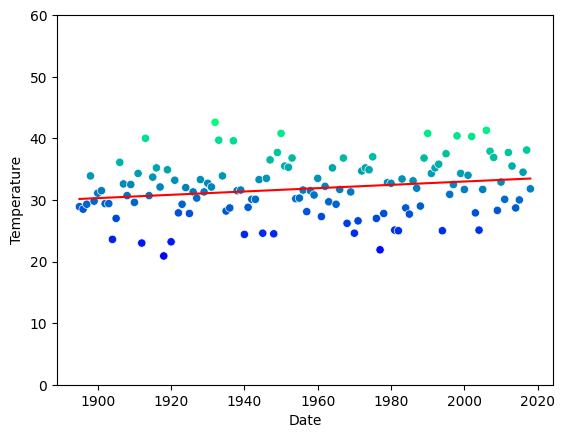

In [7]:
import seaborn as sns

axes = sns.scatterplot(data=temperatures2018, x="Date", y="Temperature", hue="Temperature", palette="winter", legend=False)

axes.set_ylim(0, 60)

import numpy as np

x = np.array([min(temperatures2018.Date.values), max (temperatures2018.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y, c="red")

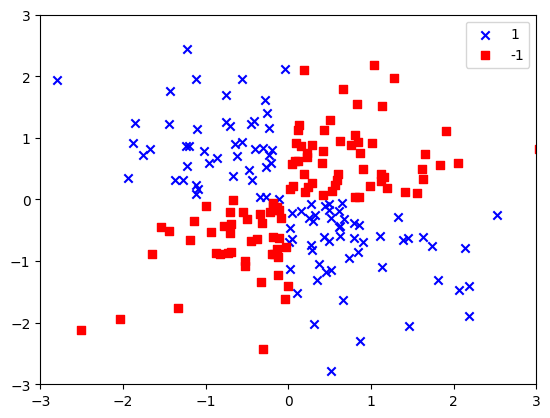

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2) # 200 rows, 2 columns of random numbers 
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) 
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], # [y_xor == 1, 0] - mask for all rows where y_xor == 1, and column 0
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Назарій\AppData\Local\Temp\ipykernel_9016\2414369443.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


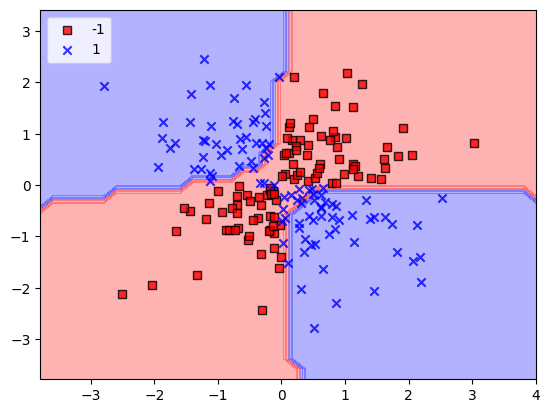

In [9]:
def plot_desicion_regions(X, y, classifier, test_idx=None, resolution=0.2):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl, edgecolors='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')
    
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_desicion_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Назарій\AppData\Local\Temp\ipykernel_9016\2414369443.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
*c* argument looks like a single numeric RGB or RGBA seq

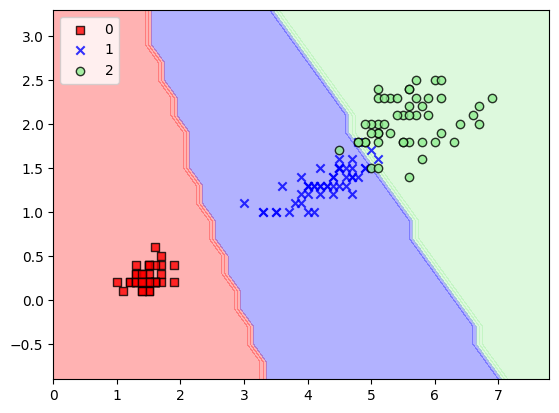

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

knn = KNeighborsClassifier()
knn.fit(X, y)

gauss = GaussianNB()
gauss.fit(X, y)

svm = SVC()
svm.fit(X, y)


# plot_desicion_regions(X, y, classifier=knn)

# plot_desicion_regions(X, y, classifier=gauss)

plot_desicion_regions(X, y, classifier=svm)

plt.legend(loc='upper left')
plt.show()
